In [1]:
import pickle
import os

In [2]:
dir_path = os.getcwd()

def gen_results_path(filename: str):
    return os.path.join(dir_path, "data", filename)

In [16]:
filename = "BullPutSpread_30_15_45_ligth"

In [17]:
with open(gen_results_path(filename), "rb") as f:
    trades = pickle.load(f)
len(trades)

42

In [24]:
dates = list(trades.keys())

In [25]:
profits = [t['profit_loss'] for t in trades.values()]

In [33]:
import numpy as np
cumm = np.cumsum(profits)
len(cumm)

42

In [26]:
import matplotlib.pyplot as plt

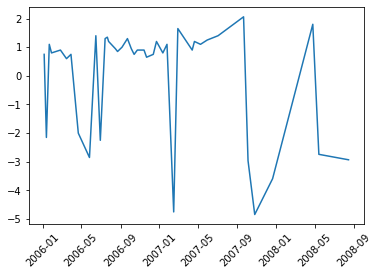

In [27]:
plt.plot(dates, profits)
plt.xticks(rotation = 45)
plt.show()

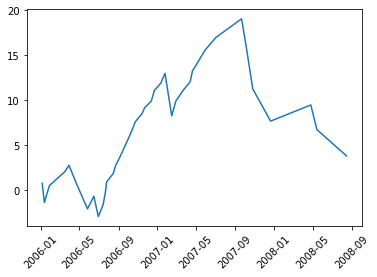

In [34]:
plt.plot(dates, cumm)
plt.xticks(rotation = 45)
plt.show()

In [28]:
total_p_l = sum([x for x in profits if x is not None])
print(f'Total P/L: {total_p_l}')

Total P/L: 3.800000000000002


In [30]:
average = total_p_l / len(profits)
print(f'Average profit: {average}')

Average profit: 0.09047619047619053


In [35]:
[t['max_loss'] for t in trades.values()]

KeyError: 'max_loss'